In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 kB 12.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
det_model = YOLO('yolov8n.pt') # detection model
inst_model = YOLO('yolov8n-seg.pt') # instance model

100%|██████████| 6.23M/6.23M [00:00<00:00, 307MB/s]
100%|██████████| 6.73M/6.73M [00:00<00:00, 318MB/s]


In [ ]:
img = '/content/img.jpg'
det_result = det_model.predict(img)
inst_result = inst_model.predict(img)


image 1/1 /content/img.jpg: 448x640 16 persons, 3 bicycles, 1 car, 3 traffic lights, 1 stop sign, 91.8ms
Speed: 13.7ms preprocess, 91.8ms inference, 43.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/img.jpg: 448x640 12 persons, 2 bicycles, 1 traffic light, 1 stop sign, 23.0ms
Speed: 1.9ms preprocess, 23.0ms inference, 5.8ms postprocess per image at shape (1, 3, 448, 640)


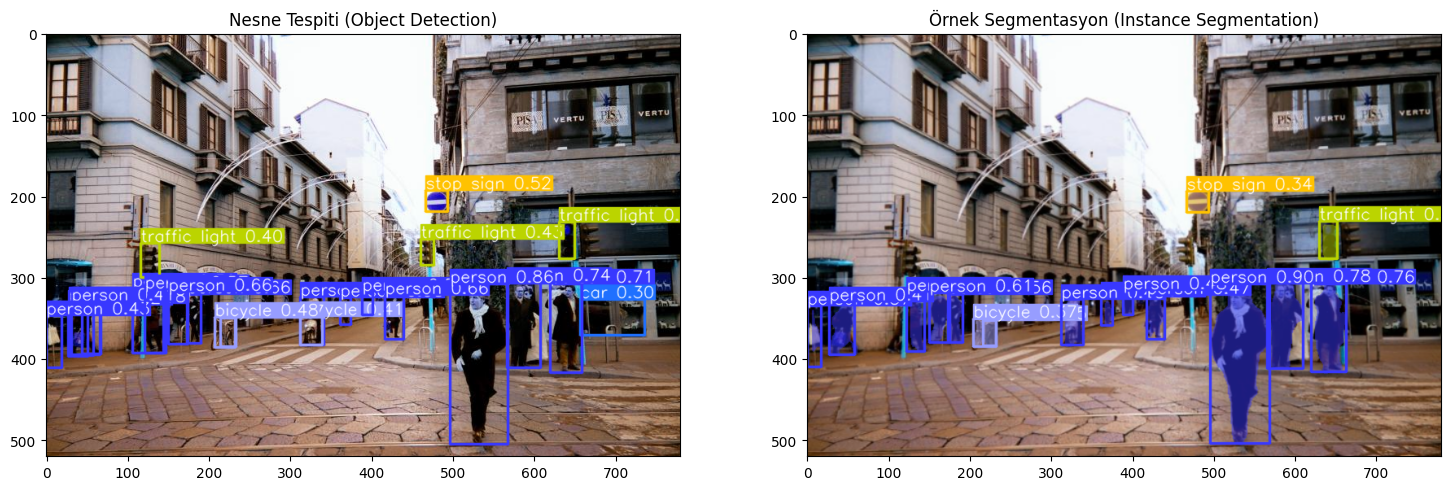

In [ ]:
detection_result_array = det_result[0].plot()
instance_result_array = inst_result[0].plot()

fig = plt.figure(figsize=(18,9))

# 1. resim ve sonuçları
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Nesne Tespiti (Object Detection)")
ax1.imshow(detection_result_array)

#2. resim ve sonuçları
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Örnek Segmentasyon (Instance Segmentation)")
ax2.imshow(instance_result_array)

In [ ]:
result = inst_result[0]
len(result)

16

In [ ]:
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 0.0
Coordinates: [495.8484802246094, 308.9651794433594, 568.1414184570312, 504.65057373046875]
Probability: 0.8972455263137817
